# Proyecto 2.
## Avances.

---
Participantes:


*   María Isabel Montoya Valladares 19169
*   Luis Pedro García Salazar 19344
* María José Morales Reichenbach 19145
* Juan Fernando de Leon Quezada  17822

### Investigación de  las técnicas que se usan para detectar patrones en lenguaje escrito
La necesidad del uso de machine learning para detectar patrones y extraer información útil en lenguaje natural o escrito ha aumentado en correlación con el crecimiento de las redes sociales, críticas en linea, encuestas y la cantidad enorme de datos que se generan hoy en día en general. Para esto, se han diseñado diversas técnicas que facilitan la detección de patrones en estos datos, para que mediante interpretaciones, se puedan sacar conclusiones que ayuden económicamente a empresas o socialmente a la población.

Entre las principales técnicas que su usan para detectar patrones en lenguaje escrito se encuentran las siguientes:
    
<ins>Reconocimiento de entidades nombradas:<ins/> 
    
Entre las técnicas mas útiles para analizar lenguaje escrito se encuentra la acción de extraer entidades en el texto. Con esta técnica se busca identificar y clasificar entidades en categorías predefinidas así como personas, lugares, organizaciones, fechas, etc. Estas técnicas se basan en reglas de gramámatica y modelos supervisados

    
<ins>Análisis de sentimiento:<ins/> 

Es la técnica de procesamiento de lenguaje natural mas usada y su mayor utilidad viene en el área de encuestas, críticas, comentarios, y cualquier lugar donde los usuarios puedan presentar sus opiniones o dar retroalimentación sobre un producto. Se basa en el proceso de determinar el tono emocional detrás de una serie de palabras para extraer información imporante sobre los cientes y sus actitudes, emociones y opiniones.  
    

<ins>Resumen de texto:<ins/> 
    
Como el nombre sugiere, esta técnica se usa para resumir grandes cuerpos de texto y se usa especialmente en artículos, noticias y artículos de investigación. Dentro de esta, existe el método de  extracción, en el cuál se hace un resumen mediante la extracción de partes del texto y la abstracción, donde se hace el resumen mediante la generación de nuevas palabras que transmiten la idea original.

<ins>Tokenización:<ins/>  
    
La tokenización en esencia, es la acción de dividir el texto entero en "tokens", que pueden existir en la forma de palabras, letras, números, puntuación, etc. con el fin de que la computadora lo entienda de una manera más eficiente. 

### Situación Problemática
Hoy en día las redes sociales ya no son plataformas que simplemente nos ayuda a conectar a personas que se encuentran en países lejanos, sino que también pueden ser usados como plataformas para establacer estrategias de diversas indoles. Twitter es una de las plataformas más populares y es usada para compartir pensamientos, situaciones, problemas, etc., por toda la población y esto tiene la importante aplicación de ser un canal de comunicación en tiempos de emergencia.

La publicación en tiempo de real de tweets provenientes de personas que se encuentran en un aprieto puede ayudar a que las autoridades puedan programar equipos de ayuda y poder salvar un mayor número de personas. Sin embargo, al ser twitter, una persona tiene toda la libertad de expresión y cada quién tiene una manera en la cuál se expresa, se pueden usar métaforas que en vez de describir algo de un desastre natural, puede que sea solo sobre algo que "is the bomb ;)" por lo que poder identificar si se está hablando de un desastre natural cierto o no es importante para poder llevar a cabo esta aplicación ya mencionada.


### Problema Ciéntifico 
El uso de metáforas que pueden confundir un analizador de texto acerca de si se encuentra analizando un tweet de un desastre natural o no. 

### Objetivos
#### Objetivo general
* Identificar palabras o frases que son frecuentes en un tweet acerca de un desastre natural real y en un tweet acerca de algo que no es un desastre natural

#### Objetivos Específicos

1. Establecer una relación entre el keyword, frases del tweet y si es un desastre natural o no (variable target).
2. Utilizar nubes de palabras para analizar las expresiones comunes en tweets de desastres.
3. Clasificar los desastres naturales por categoría y brindar prioridad.

### Descripción de los datos
Los datos se nos presentan en un dataframe que contiene las siguientes variables:
* id: el cuál es unico para cada tweet
* keyword: palabra clave para cada tweet
* location: ubicación del tweet
* text: cuerpo del tweet
* target: si es sobre un desastre natural o no

A continuación se muestra los 10 primeros tweets para visualizar la información. 

In [1]:
import pandas as pd #libreria de visualizacion de texto
import numpy as np #libreria de operaciones matematicas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
from nltk.corpus import stopwords #limpieza de datos

from wordcloud import WordCloud #graficas

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



datos=pd.read_csv('train (1).csv')
datos.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jfdel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
datos.id.count()


7613

En el archivo podemos ver que los tipos de las columnas son los siguientes.

In [6]:
datos.dtypes


id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

En el dataset nos encontramos  con 7613 datos iniciales. Como se puede observar, en la tabla se nos muestran muchos NaN por lo que veremos cuantos y cuáles son las columnas que los contienen.

In [7]:
datos.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Los Nan en location no son relevantes en el estudio que queremos hacer ahora por lo que estos se dejarán. Sin embargo, creemos importante los Nan en keyword por lo que los eliminaremos. 

In [8]:
datos = datos.dropna(subset=['keyword'])
datos.isnull().sum()
datos.head(10)


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0


In [9]:
datos.id.count()

7552

Finalizando con 7613 observaciones finales, donde las únicas variables cuantitativas son id y target. Sin embargo, se conoce que id es un valor único y que target solo puede tomar dos valores posibles, por lo que hacer gráficas estadisticas en estas variables no es útil. Por lo que se procede a hacer una tabla de frecuencias de target, location y keyword.

##### Target

In [10]:
pd.crosstab(index=datos['target'], columns='count')


col_0,count
target,
0,4323
1,3229


<AxesSubplot:>

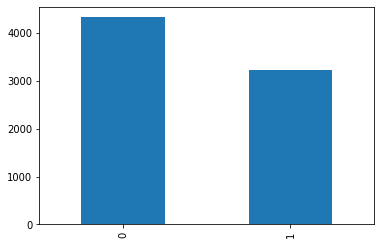

In [11]:
datos['target'].value_counts().plot(kind='bar')



Aquí podemos observar que estamos tratando con más tweets 'falsos' de desastre natural que tweets ciertos. Sin embargo, la diferencia no es tan grande entre estos dos.

##### keywords

In [12]:
pd.crosstab(index=datos['keyword'], columns='count')


col_0,count
keyword,
ablaze,36
accident,35
aftershock,34
airplane%20accident,35
ambulance,38
...,...
wounded,37
wounds,33
wreck,37


<AxesSubplot:>

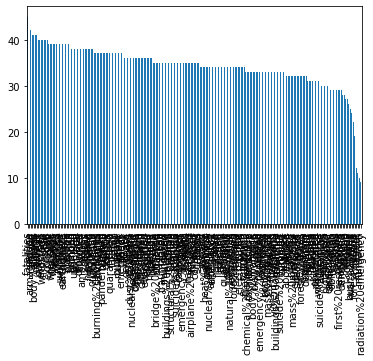

In [13]:
datos['keyword'].value_counts().plot(kind='bar')


De la gráfica podemos ver que hay keywords muy comunes como fatalities o muy poco común como radiation emergency. Algo que también nos demuestra esto es que muchos keywords tienen %20 como separador de palabras por lo que se requiere hacer limpieza de eso en esta columna. 

##### Location

In [14]:
pd.crosstab(index=datos['location'], columns='count')


col_0,count
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
...,...
å_: ?? ÌÑ ? : ?,1
å_å_Los Mina Cityã¢,1
å¡å¡Midwest Û¢Û¢,1


De lo que podemos observar es que la columna de location también requiere de limpieza. Pero que puede que no sea útil para un análisis de este tipo. 

#### Limpieza de datos
Ya se eliminaron los NaN de las columnas importantes y en las tablas y gráficas visto anteriormente nos dimos que cuenta que en lass columnas de location y keyword también se necesitan procesos de limpieza, no solo en tweets. Por lo que se hace primero la eliminacion de letras mayúsculas y se pasan a minúsculas.

In [15]:
datos['keyword'] = datos['keyword'].str.lower()
datos['location'] = datos['location'].str.lower()
datos['text'] = datos['text'].str.lower()

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd wholesale markets ablaze http://t.co/l...,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy. #metal #rt h...,0
33,50,ablaze,africa,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",crying out for more! set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remplaza los %20 de la columna keywords por espacios.

<AxesSubplot:>

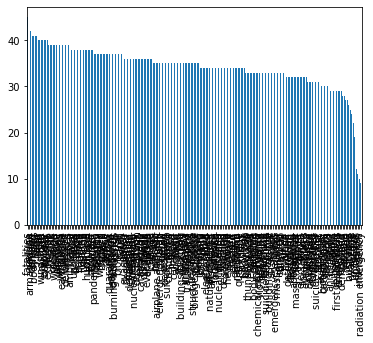

In [16]:
datos['keyword'] = datos['keyword'].str.replace('%20',' ')
datos['keyword'].value_counts().plot(kind='bar')


Eliminamos los elementos que son componentes de URLs para no tener más signos que nos interferan en el manejo de los datos durante el análisis. 

In [17]:
datos['text'] = datos['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
datos['text'] = datos['text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,@bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy. #metal #rt,0
33,50,ablaze,africa,#africanbaze: breaking news:nigeria flag set a...,1
34,52,ablaze,"philadelphia, pa",crying out for more! set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remueve los caracteres especiales de las columna de text para poder hacer un analisis de texto.

In [18]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
datos['text'] = datos['text'].apply(remove_punctuations)
datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying out for more set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


En este tipo de análisis emojis pueden ser caracteres que pueden confundir más a la computadora por lo que se eliminaran estos de la columna de tweets.

In [19]:
datos.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying out for more set me ablaze,0
35,53,ablaze,"london, uk",on plus side look at the sky last night it was...,0


Se remueven los stopwords de text.

In [20]:
stop = stopwords.words('english')

datos['text'] = datos['text'].str.lower().str.split() 

datos['text'] = datos['text'].apply(lambda x: [item for item in x if item not in stop])
datos['text'] = [' '.join(map(str, l)) for l in datos['text']]

datos.head()

,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,est. september 2012 - bristol,always try bring heavy metal rt,0
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
34,52,ablaze,"philadelphia, pa",crying set ablaze,0
35,53,ablaze,"london, uk",plus side look sky last night ablaze,0


#### Análisis

Se comienza a hacer un gráfico de correlación entre las variables enteras de nuestro dataset. 

<AxesSubplot:>

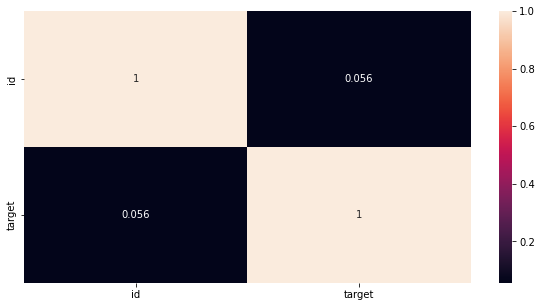

In [21]:
corr = datos.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cbar=True, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Como podemos ver, la verdad es que estas dos variables no se relacionan en nada por lo que no tiene sentido tener cruzar estas variables, sin embargo, si es de suma importancia y nos puede dar 'Insights' hacer gráficas de palabras dependiendo si si es un desastre natural o no. Por lo que se prosigue a dividir la base de datos en dos. 

In [22]:
noDesastre = datos.loc[datos['target'] == 0]
siDesastre = datos.loc[datos['target'] == 1]
noDesastre.head(5)



,id,keyword,location,text,target
32,49,ablaze,est. september 2012 - bristol,always try bring heavy metal rt,0
34,52,ablaze,"philadelphia, pa",crying set ablaze,0
35,53,ablaze,"london, uk",plus side look sky last night ablaze,0
36,54,ablaze,pretoria,phdsquares mufc theyve built much hype around ...,0
39,57,ablaze,paranaque city,ablaze lord,0


In [23]:
siDesastre.head(5)


,id,keyword,location,text,target
31,48,ablaze,birmingham,bbcmtd wholesale markets ablaze,1
33,50,ablaze,africa,africanbaze breaking newsnigeria flag set abla...,1
37,55,ablaze,world wide!!,inec office abia set ablaze,1
38,56,ablaze,NaN,barbados bridgetown jamaica ûò two cars set a...,1
46,66,ablaze,"greensboro,north carolina",west burned thousands wildfires ablaze califor...,1


Se obtiene un wordcloud de los desastres naturales que no son desastres naturales.

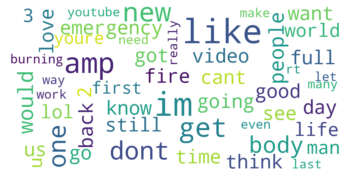

In [24]:
tc = {} #dic con counters
    
for review in noDesastre['text']:
    text = review.split(' ')
    for word in text:
        counter = tc.get(word)
        if counter:
            tc[word] = counter + 1
        else:
            tc[word] = 1

# create the WordCloud object
wordcloud = WordCloud(background_color="white",max_words=50,max_font_size=40,scale=3,random_state=1)

# generate the word cloud
wordcloud.generate_from_frequencies(tc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Aquí podemos ver que los tweets que no son desastres naturales poseen varias veces palabras consideradas como 'positivas' entonces se puede hacer un sentiment analysis y probar que los tweets sobre desastres naturales usan palabras positivas en ellos.

Se obtiene un wordcloud del dataframe que si es de desastres.

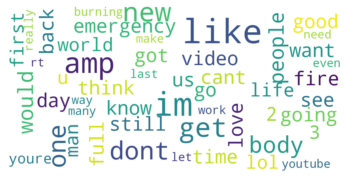

In [25]:
ntc = {} #dic con counters
    
for review in siDesastre['text']:
    text = review.split(' ')
    for word in text:
        counter = tc.get(word)
        if counter:
            ntc[word] = counter + 1
        else:
            ntc[word] = 1

# create the WordCloud object
wordcloud = WordCloud(background_color="white",max_words=50,max_font_size=40,scale=3,random_state=1)

# generate the word cloud
wordcloud.generate_from_frequencies(ntc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

De este wordcloud podemos ver que nuestra impresión es incorrecta y estos tweets si tiene palabras positivas en esa dataframe.

##### Keywords de no desastres y de desastres

<AxesSubplot:>

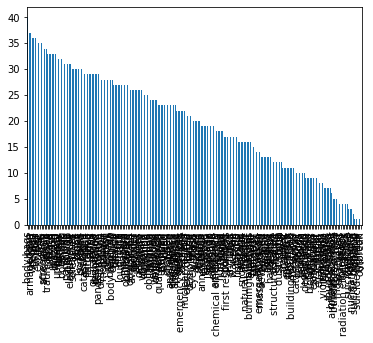

In [26]:
noDesastre['keyword'].value_counts().plot(kind='bar')


<AxesSubplot:>

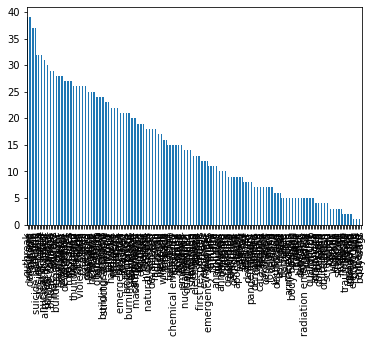

In [27]:
siDesastre['keyword'].value_counts().plot(kind='bar')


## Sentiment Analysis
Se busca hacer un sentiment analysis de ambas bases de datos creadas para descubrir si la base de no desastres posee tweets con más palabras positivas que negativas y si en la base de si desastres pasa totalmente lo contrario

#### noDesastre

In [28]:
# Tweet sentiment Counters
positive = 0
negative = 0
neutral = 0

polarity = 0

# Tweet sentiment Lists
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [29]:
for tweet in noDesastre.text:
    
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

In [30]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

noOfTweet = len(noDesastre.text)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Miremos la cantidad de tweets y sus sentimientos

In [31]:
#Number of Tweets (Total, Positive, Negative, Neutral)tweet_list = pd.DataFrame(tweet_list)

tweet_list = pd.DataFrame(tweet_list)

neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print('total number: ', len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  4323
positive number:  1397
negative number:  1798
neutral number:  1128


Es probable que algunos tweets esten duplicados, por lo que se deben eliminar los duplicados utilizando la función drop_duplicates.

In [32]:
tweet_list.drop_duplicates(inplace = True)

In [33]:
tweet_list

,0
0,always try bring heavy metal rt
1,crying set ablaze
2,plus side look sky last night ablaze
3,phdsquares mufc theyve built much hype around ...
4,ablaze lord
...,...
4318,jtruff23 cameronhacker wrecked
4319,three days work theyve pretty much wrecked hah...
4320,fx forex trading cramer igers 3 words wrecked ...
4321,engineshed great atmosphere british lion gig t...


Ahora, con los datos limpios se puede calcular los parámetros de polaridad, subjetividad, sentimiento, negativos, positivos, neutros y compuestos. Para todos los parámetros calculados, se crean nuevas columnas en el data frame.

In [34]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list[0].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tweet_list[0].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = 'positive'
    else:
        tweet_list.loc[index, 'sentiment'] = 'neutral'
    
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list

,0,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,always try bring heavy metal rt,-0.200000,0.500000,neutral,0.000,1.000,0.000,0.0000
1,crying set ablaze,-0.200000,0.600000,negative,0.608,0.392,0.000,-0.4767
2,plus side look sky last night ablaze,0.000000,0.066667,neutral,0.000,1.000,0.000,0.0000
3,phdsquares mufc theyve built much hype around ...,0.168182,0.327273,negative,0.161,0.839,0.000,-0.3612
4,ablaze lord,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
4318,jtruff23 cameronhacker wrecked,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4319,three days work theyve pretty much wrecked hah...,0.216667,0.533333,positive,0.000,0.570,0.430,0.7783
4320,fx forex trading cramer igers 3 words wrecked ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4321,engineshed great atmosphere british lion gig t...,0.400000,0.375000,positive,0.000,0.661,0.339,0.6249


Separamos 3 grupos según el sentimiento.

In [35]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tweet_list[tweet_list['sentiment']=='negative']
tw_list_positive = tweet_list[tweet_list['sentiment']=='positive']
tw_list_neutral = tweet_list[tweet_list['sentiment']=='neutral']

Vamos a contar los valores y ver el porcentaje total.

In [36]:
def count_values_in_column(data,feature):

    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    
    return pd.concat([total,percentage],axis=1,keys=['Total', 'Percentage'])#Count_values for sentiment

count_values_in_column(tweet_list,'sentiment')

,Total,Percentage
negative,1698,42.20
positive,1330,33.05
neutral,996,24.75


Creamos un gráfico utilizando los datos y la informacion del analisis de sentimientos de los tweets.

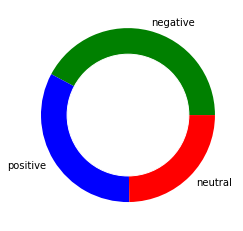

In [37]:
# create data for Pie Chart
pc = count_values_in_column(tweet_list,'sentiment')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### siDesastres

In [38]:
# Tweet sentiment Counters
positive = 0
negative = 0
neutral = 0

polarity = 0

# Tweet sentiment Lists
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [39]:
for tweet in siDesastre.text:
    
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

In [40]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

noOfTweet = len(siDesastre.text)

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Miremos la cantidad de tweets y sus sentimientos

In [41]:
#Number of Tweets (Total, Positive, Negative, Neutral)tweet_list = pd.DataFrame(tweet_list)

tweet_list = pd.DataFrame(tweet_list)

neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print('total number: ', len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  3229
positive number:  538
negative number:  1807
neutral number:  884


Es probable que algunos tweets esten duplicados, por lo que se deben eliminar los duplicados utilizando la función drop_duplicates.

In [42]:
tweet_list.drop_duplicates(inplace = True)

In [43]:
tweet_list

,0
0,bbcmtd wholesale markets ablaze
1,africanbaze breaking newsnigeria flag set abla...
2,inec office abia set ablaze
3,barbados bridgetown jamaica ûò two cars set a...
4,west burned thousands wildfires ablaze califor...
...,...
3213,check malaysia confirms plane wreckage flight ...
3224,wreckage conclusively confirmed missing flight...
3226,israel wrecked home wants land
3227,300k exotic car wrecked train accident


Ahora, con los datos limpios se puede calcular los parámetros de polaridad, subjetividad, sentimiento, negativos, positivos, neutros y compuestos. Para todos los parámetros calculados, se crean nuevas columnas en el data frame.

In [44]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list[['polarity', 'subjectivity']] = tweet_list[0].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in tweet_list[0].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tweet_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tweet_list.loc[index, 'sentiment'] = 'positive'
    else:
        tweet_list.loc[index, 'sentiment'] = 'neutral'
    
    tweet_list.loc[index, 'neg'] = neg
    tweet_list.loc[index, 'neu'] = neu
    tweet_list.loc[index, 'pos'] = pos
    tweet_list.loc[index, 'compound'] = comp

tweet_list

,0,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,bbcmtd wholesale markets ablaze,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
1,africanbaze breaking newsnigeria flag set abla...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
2,inec office abia set ablaze,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
3,barbados bridgetown jamaica ûò two cars set a...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
4,west burned thousands wildfires ablaze califor...,0.0,0.000,negative,0.250,0.750,0.0,-0.2500
...,...,...,...,...,...,...,...,...
3213,check malaysia confirms plane wreckage flight ...,0.0,0.000,neutral,0.000,1.000,0.0,0.0000
3224,wreckage conclusively confirmed missing flight...,0.1,0.525,negative,0.239,0.761,0.0,-0.2960
3226,israel wrecked home wants land,0.2,0.100,neutral,0.000,1.000,0.0,0.0000
3227,300k exotic car wrecked train accident,0.5,1.000,negative,0.383,0.617,0.0,-0.4767


Separamos 3 grupos según el sentimiento.

In [45]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tweet_list[tweet_list['sentiment']=='negative']
tw_list_positive = tweet_list[tweet_list['sentiment']=='positive']
tw_list_neutral = tweet_list[tweet_list['sentiment']=='neutral']

Vamos a contar los valores y ver el porcentaje total.

In [46]:
def count_values_in_column(data,feature):

    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    
    return pd.concat([total,percentage],axis=1,keys=['Total', 'Percentage'])#Count_values for sentiment

count_values_in_column(tweet_list,'sentiment')

,Total,Percentage
negative,1568,56.77
neutral,699,25.31
positive,495,17.92


Creamos un gráfico utilizando los datos y la informacion del analisis de sentimientos de los tweets.

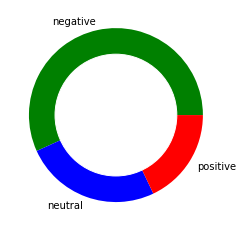

In [47]:
# create data for Pie Chart
pc = count_values_in_column(tweet_list,'sentiment')
names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Conclusiones
Nosotros esperabamos una diferencia más grande en los keywords y poder establecer una relación a partir de eso. Sin embargo, no fue así, siguen habiendo tweets con keywords como "chemical reaction" que aparecen en tweets que no son de desastres naturales. 

Una diferencia que puede ayudarnos para establecer una relación entre si es un desastre natural o no. Como pudo observarse en el sentiment analysis el numero de tweets negativos tanto en los de si desastre o no desastre es muy similar. 

Para poder tener mejores resultados se recomienda hacer un analisis del tipo de cuenta que esta poniendo el tweet y el tipo de comentarios que se tienen. Este analisis incluira en el resultado si es un tweet escrito por alguien que suele compartir tweets de desastres naturales y si los comentarios se relacionan a una tragedia.

# Modeling
Nuestro primer approach al problema era el de usar un analisis de sentimientos para poder clasificar los tweets basandonos en la polaridad del tweet a entrar. Sin embargo, del apartado anterior nos dimos cuenta que en términos de polaridad, los que son de tweets reales y los que no tienen un porcentaje similar de positivos, negativos y neutrales. Por lo que decidimos buscar otros modelos para poder clasificar nuestros tweets. 

## Vectorizer +Multinomial NB
El primer modelo a probar es el modelo de vectorizer con una mezcla de naive bayes para conocer si este logra clasificar bien los datos. Importamos los datos. Primero importamos los datos y las librerias pertinentes para realizar esto. 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('train (1).csv')
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Hacemos los cmabios necesarios para poder realizar lo que se necesita para vecotrizar el texto. Primero tenemos que hacer una limpieza acerca de la eliminacion de los Na's presentes en el dataset, luego poder encontrar la manera de reunir todo el texto disponible del tweet bajo una sola columna para pdoer vectorizar los más posible. 

In [49]:
train_df['text length'] = train_df['text'].apply(len)
train_df['location'].isnull().sum()
train_df['keyword'].isnull().sum()
train_df['keyword'].unique()
train_df['keyword'] = train_df['keyword'].str.replace('%20', ' ')
train_df['keyword'].nunique()
train_df['keyword'] = train_df['keyword'].fillna(train_df['keyword'].mode()[0])
train_df['location'] = train_df['location'].fillna(train_df['location'].mode()[0])
train_df['new text'] = train_df['text'] +' '+ train_df['location'] +' '+ train_df['keyword']
train_df['new text'] = train_df['new text'].str.replace('#', ' ')
train_df.head()

,id,keyword,location,text,target,text length,new text
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,69,Our Deeds are the Reason of this earthquake M...
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,38,Forest fire near La Ronge Sask. Canada USA fat...
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,133,All residents asked to 'shelter in place' are ...
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,65,"13,000 people receive wildfires evacuation or..."
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,88,Just got sent this photo from Ruby Alaska as ...


Creamos los datasets de train y test para la clasificacion de los tweets apartir del train, esto apr apoder ver un accuracy de nuestro algoritmo y poder ver si lo hizo correctamente. Tenemos que el train consistira del 70% de los datos totales, mientras que el test es del 30%.

In [50]:
from sklearn.model_selection import train_test_split

X = train_df
train, test = train_test_split(X, test_size=0.3,train_size=0.7)


In [51]:
train.head()

,id,keyword,location,text,target,text length,new text
4156,5905,harm,WORLD WIDE,ÛÏFor I know the plans I have for youÛ decl...,0,138,ÛÏFor I know the plans I have for youÛ decl...
3978,5654,flooding,USA,Wen I finally get the girl I want I'm flooding...,0,77,Wen I finally get the girl I want I'm flooding...
5066,7223,natural disaster,America of Founding Fathers,This is the natural and unavoidable consequenc...,1,116,This is the natural and unavoidable consequenc...
7478,10696,wreck,"Victoria, BC",@Memenaar But the design decision to 'Let's ma...,0,140,@Memenaar But the design decision to 'Let's ma...
741,1072,bleeding,Alberta Pack,@ColoicCarnality You were bleeding my instinct...,0,110,@ColoicCarnality You were bleeding my instinct...


In [52]:
test.head()

,id,keyword,location,text,target,text length,new text
3671,5226,fatality,USA,Wow fatality on 101 big rig hit motorcyclist b...,1,79,Wow fatality on 101 big rig hit motorcyclist b...
4387,6233,hijacker,USA,How to Remove Softenza Hijacker? Softenza Anth...,0,87,How to Remove Softenza Hijacker? Softenza Anth...
555,804,battle,"San Jose, CA",Kelby Tomlinson mild-mannered 2nd baseman for ...,0,136,Kelby Tomlinson mild-mannered 2nd baseman for ...
7387,10571,windstorm,USA,School Of Seven Bells - Windstorm http://t.co...,0,69,School Of Seven Bells - Windstorm http://t.co...
4176,5932,harm,USA,@RJG0789 idk....I feel like his movies have do...,0,137,@RJG0789 idk....I feel like his movies have do...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

X_train = train['new text']
y_train = train['target']
X_test = test['new text']

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integ
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [55]:
X_train = train['new text']
y_train = train['target']
X_test = test['new text']
pipeline.fit(X_train, y_train)


Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [56]:
y_test = pipeline.predict(X_test)
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [57]:

test['pred_targVec'] = y_test
test.head()


,id,keyword,location,text,target,text length,new text,pred_targVec
3671,5226,fatality,USA,Wow fatality on 101 big rig hit motorcyclist b...,1,79,Wow fatality on 101 big rig hit motorcyclist b...,0
4387,6233,hijacker,USA,How to Remove Softenza Hijacker? Softenza Anth...,0,87,How to Remove Softenza Hijacker? Softenza Anth...,0
555,804,battle,"San Jose, CA",Kelby Tomlinson mild-mannered 2nd baseman for ...,0,136,Kelby Tomlinson mild-mannered 2nd baseman for ...,0
7387,10571,windstorm,USA,School Of Seven Bells - Windstorm http://t.co...,0,69,School Of Seven Bells - Windstorm http://t.co...,0
4176,5932,harm,USA,@RJG0789 idk....I feel like his movies have do...,0,137,@RJG0789 idk....I feel like his movies have do...,0


In [58]:
coin = 0
total = len(test)
for i in range(total):
    targ = test.iloc[i,4]
    predtarg = test.iloc[i,7]
    if (targ == predtarg):
        coin += 1
print('coincidencias: ' + str(coin))
accV = (coin / total)*100
print('accuracy del algoritmo: ' + str(accV)+'%')

coincidencias: 1842
accuracy del algoritmo: 80.64798598949213%


In [59]:
pd.crosstab(index=test['target'], columns='count')


col_0,count
target,
0,1303
1,981


<AxesSubplot:xlabel='target', ylabel='count'>

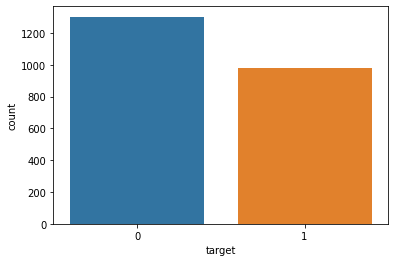

In [60]:
sns.countplot(data=test, x='target')



In [61]:
pd.crosstab(index=test['pred_targVec'], columns='count')


col_0,count
pred_targVec,
0,1355
1,929


<AxesSubplot:xlabel='pred_targVec', ylabel='count'>

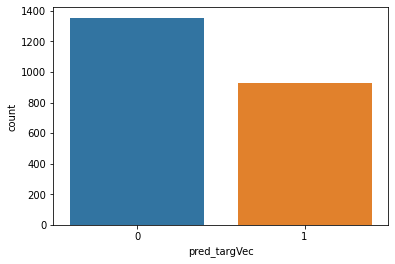

In [62]:
sns.countplot(data=test, x='pred_targVec')


Como podemos ver el modelo generado tiene un accuracy del 79%, lo cual no esta mal, sin embargo, tal vez con otro algoritmo podemos llegar a una mejor cantidad de accuracy. Aqui como podemos observar, el modelo predijo que mas tweets tratabn de desastres naturales reales, cuando realmente no lo eran.

## Vectorizer Tfidf


In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

In [64]:
train.head()

,id,keyword,location,text,target,text length,new text
4156,5905,harm,WORLD WIDE,ÛÏFor I know the plans I have for youÛ decl...,0,138,ÛÏFor I know the plans I have for youÛ decl...
3978,5654,flooding,USA,Wen I finally get the girl I want I'm flooding...,0,77,Wen I finally get the girl I want I'm flooding...
5066,7223,natural disaster,America of Founding Fathers,This is the natural and unavoidable consequenc...,1,116,This is the natural and unavoidable consequenc...
7478,10696,wreck,"Victoria, BC",@Memenaar But the design decision to 'Let's ma...,0,140,@Memenaar But the design decision to 'Let's ma...
741,1072,bleeding,Alberta Pack,@ColoicCarnality You were bleeding my instinct...,0,110,@ColoicCarnality You were bleeding my instinct...


In [65]:
test.head()

,id,keyword,location,text,target,text length,new text,pred_targVec
3671,5226,fatality,USA,Wow fatality on 101 big rig hit motorcyclist b...,1,79,Wow fatality on 101 big rig hit motorcyclist b...,0
4387,6233,hijacker,USA,How to Remove Softenza Hijacker? Softenza Anth...,0,87,How to Remove Softenza Hijacker? Softenza Anth...,0
555,804,battle,"San Jose, CA",Kelby Tomlinson mild-mannered 2nd baseman for ...,0,136,Kelby Tomlinson mild-mannered 2nd baseman for ...,0
7387,10571,windstorm,USA,School Of Seven Bells - Windstorm http://t.co...,0,69,School Of Seven Bells - Windstorm http://t.co...,0
4176,5932,harm,USA,@RJG0789 idk....I feel like his movies have do...,0,137,@RJG0789 idk....I feel like his movies have do...,0


In [66]:
testn = test[["id","text"]]
trainn = train[["text", "target"]]
X_train = trainn.text
y_train = trainn.target
X_test = testn.text
vectorizer = TfidfVectorizer(use_idf=True)
vectorizer = vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
clf = MLPClassifier(random_state=1, 
                    max_iter=300, 
                    verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.66561707
Iteration 2, loss = 0.56062319
Iteration 3, loss = 0.43562520
Iteration 4, loss = 0.33458378
Iteration 5, loss = 0.26097842
Iteration 6, loss = 0.20738448
Iteration 7, loss = 0.16673955
Iteration 8, loss = 0.13630136
Iteration 9, loss = 0.11259105
Iteration 10, loss = 0.09408069
Iteration 11, loss = 0.07956276
Iteration 12, loss = 0.06803276
Iteration 13, loss = 0.05892268
Iteration 14, loss = 0.05133803
Iteration 15, loss = 0.04511636
Iteration 16, loss = 0.04027684
Iteration 17, loss = 0.03593755
Iteration 18, loss = 0.03259591
Iteration 19, loss = 0.02944246
Iteration 20, loss = 0.02699766
Iteration 21, loss = 0.02493171
Iteration 22, loss = 0.02312808
Iteration 23, loss = 0.02171236
Iteration 24, loss = 0.02019204
Iteration 25, loss = 0.01910837
Iteration 26, loss = 0.01810192
Iteration 27, loss = 0.01726552
Iteration 28, loss = 0.01628425
Iteration 29, loss = 0.01564961
Iteration 30, loss = 0.01495671
Iteration 31, loss = 0.01464754
Iteration 32, los

MLPClassifier(max_iter=300, random_state=1, verbose=True)

In [67]:
X_test = vectorizer.transform(X_test)
pred = clf.predict(X_test)
test['pred_targTFIDF'] = pred
test.head()

,id,keyword,location,text,target,text length,new text,pred_targVec,pred_targTFIDF
3671,5226,fatality,USA,Wow fatality on 101 big rig hit motorcyclist b...,1,79,Wow fatality on 101 big rig hit motorcyclist b...,0,1
4387,6233,hijacker,USA,How to Remove Softenza Hijacker? Softenza Anth...,0,87,How to Remove Softenza Hijacker? Softenza Anth...,0,0
555,804,battle,"San Jose, CA",Kelby Tomlinson mild-mannered 2nd baseman for ...,0,136,Kelby Tomlinson mild-mannered 2nd baseman for ...,0,0
7387,10571,windstorm,USA,School Of Seven Bells - Windstorm http://t.co...,0,69,School Of Seven Bells - Windstorm http://t.co...,0,0
4176,5932,harm,USA,@RJG0789 idk....I feel like his movies have do...,0,137,@RJG0789 idk....I feel like his movies have do...,0,0


In [68]:
coin = 0
total = len(test)
for i in range(total):
    targ = test.iloc[i,4]
    predtarg = test.iloc[i,8]
    if (targ == predtarg):
        coin += 1
print('coincidencias: ' + str(coin))
acc = (coin / total)*100
print('accuracy del algoritmo: ' + str(acc)+'%')

coincidencias: 1768
accuracy del algoritmo: 77.40805604203153%


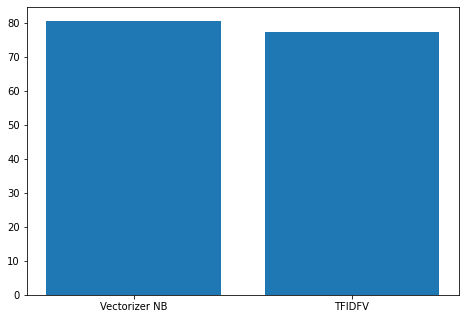

In [69]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Vectorizer NB', 'TFIDFV']
students = [accV, acc]
ax.bar(langs,students)
plt.show()

### Discusión

Se trabajóo el algoritmo Vectorizer +Multinomial NB y el algoritmo Vectorizer Tfidf. Se obtuvo un accuracy de 80% y 77% respectivamente. Podemos apreciar que con ambos modelos se obtuvo un porcentaje de accuracy similar, sin embargo, Vectorizer +Multinomial NB se adapta mejor a nuestro conjunto de datos, siendo este el mas efectivo. 

### Referencias

## Avances 3 de Proyecto 2

En este proyecto contamos con datos valiosos e interesantes a los son necesarios acceder y analizar. Para facilitar esto se utilizara una herramienta para realizar paneles dinámicos donde se puedan ejecutar consultas fácilmente y ver visualizaciones interactivas personalizadas.

Un tablero de datos consta de muchos componentes diferentes. Dentro de estos se pueden mencionar los siguientes:

* Analizar: manipular datos utilizando, por ejemplo, Pandas.
* Visualizar: crear diagramas de los datos utilizando, por ejemplo, Bokeh.
* Interactuar: aceptar la input del usuario utilizando una interfaz como React.
* Servir: manejar solicitudes de los usuarios y retornar páginas web utilizando un servidor web como Flask.

Dentro de las herramientas a utilizar en este proyecto se proponen las siguientes:
    
    - Dash
    - Streamlit
    - Voila
    - Panel
    
No todas las bibliotecas son directamente comparables.Sin embargo, cada biblioteca se centra en un área distinta.

Cuando hablamos de Streamlit, Dash o Panel se trata de soluciones completas de panel de control, centradas en el análisis de datos basado en Python y que se ejecutan en los marcos web Tornado y Flask. Mientras que Voila es una biblioteca que convierte los cuadernos individuales de Jupyter en páginas web interactivas.